In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
Age                   520 non-null int64
Gender                520 non-null object
Polyuria              520 non-null object
Polydipsia            520 non-null object
sudden weight loss    520 non-null object
weakness              520 non-null object
Polyphagia            520 non-null object
Genital thrush        520 non-null object
visual blurring       520 non-null object
Itching               520 non-null object
Irritability          520 non-null object
delayed healing       520 non-null object
partial paresis       520 non-null object
muscle stiffness      520 non-null object
Alopecia              520 non-null object
Obesity               520 non-null object
class                 520 non-null object
dtypes: int64(1), object(16)
memory usage: 69.2+ KB


In [5]:
df['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [6]:
for f in df.columns:
    print(f'{f} {df[f].unique()}')

Age [40 58 41 45 60 55 57 66 67 70 44 38 35 61 54 43 62 39 48 32 42 52 53 37
 49 63 30 50 46 36 51 59 65 25 47 28 68 56 31 85 90 72 69 79 34 16 33 64
 27 29 26]
Gender ['Male' 'Female']
Polyuria ['No' 'Yes']
Polydipsia ['Yes' 'No']
sudden weight loss ['No' 'Yes']
weakness ['Yes' 'No']
Polyphagia ['No' 'Yes']
Genital thrush ['No' 'Yes']
visual blurring ['No' 'Yes']
Itching ['Yes' 'No']
Irritability ['No' 'Yes']
delayed healing ['Yes' 'No']
partial paresis ['No' 'Yes']
muscle stiffness ['Yes' 'No']
Alopecia ['Yes' 'No']
Obesity ['Yes' 'No']
class ['Positive' 'Negative']


In [7]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['class'] = df['class'].map({'Positive':1,'Negative':0})
df['Polyuria'] = df['Polyuria'].map({'Yes':1,'No':0})
df['Polydipsia'] = df['Polydipsia'].map({'Yes':1,'No':0})
df['sudden weight loss'] = df['sudden weight loss'].map({'Yes':1,'No':0})
df['weakness'] = df['weakness'].map({'Yes':1,'No':0})
df['Polyphagia'] = df['Polyphagia'].map({'Yes':1,'No':0})
df['Genital thrush'] = df['Genital thrush'].map({'Yes':1,'No':0})
df['visual blurring'] = df['visual blurring'].map({'Yes':1,'No':0})
df['Itching'] = df['Itching'].map({'Yes':1,'No':0})
df['Irritability'] = df['Irritability'].map({'Yes':1,'No':0})
df['delayed healing'] = df['delayed healing'].map({'Yes':1,'No':0})
df['partial paresis'] = df['partial paresis'].map({'Yes':1,'No':0})
df['muscle stiffness'] = df['muscle stiffness'].map({'Yes':1,'No':0})
df['Alopecia'] = df['Alopecia'].map({'Yes':1,'No':0})
df['Obesity'] = df['Obesity'].map({'Yes':1,'No':0})

In [8]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [9]:
corrdata = df.corr()

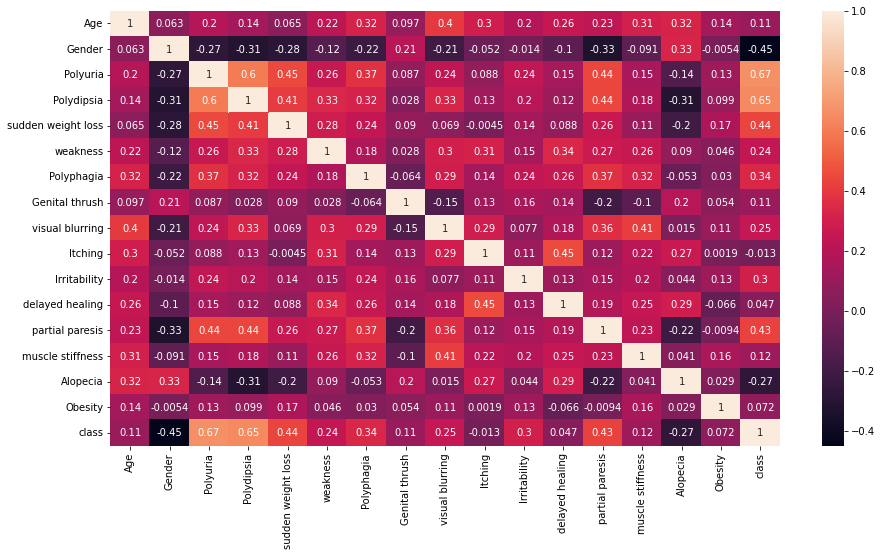

In [10]:
ax,fig = plt.subplots(figsize=(15,8))
sns.heatmap(corrdata,annot=True)

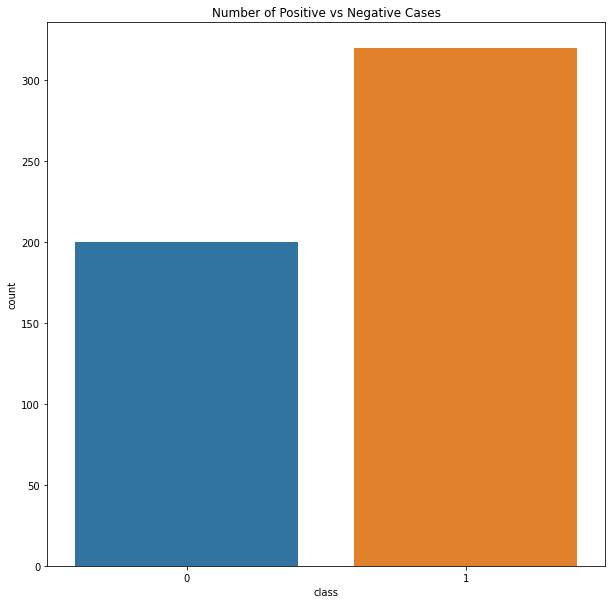

In [11]:
plt.figure(figsize=(10,10))
plt.title('Number of Positive vs Negative Cases')
sns.countplot(data=df, x='class');

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


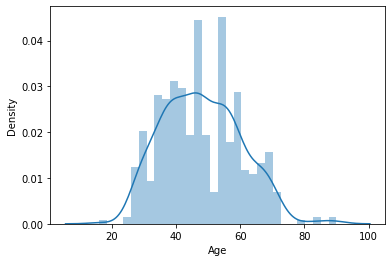

In [12]:
sns.distplot(df['Age'],bins=30)  

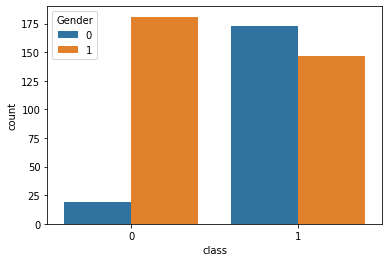

In [13]:
sns.countplot(x='class',data=df,hue='Gender')

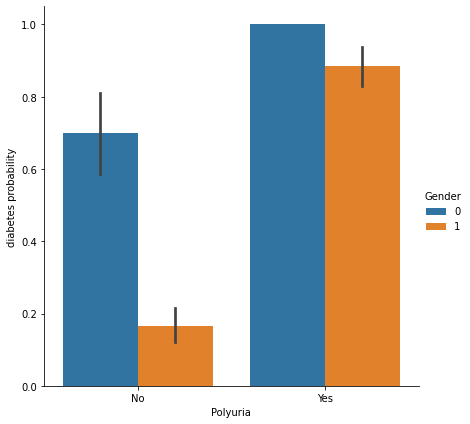

In [14]:
# Explore Polyuria vs class by Gender
g = sns.catplot(x="Polyuria", y="class", hue="Gender", data=df,
                   height=6, kind="bar")
g = g.set_ylabels("diabetes probability")
g.set_xticklabels(["No", "Yes"])
new_labels = ['Female', 'Male']


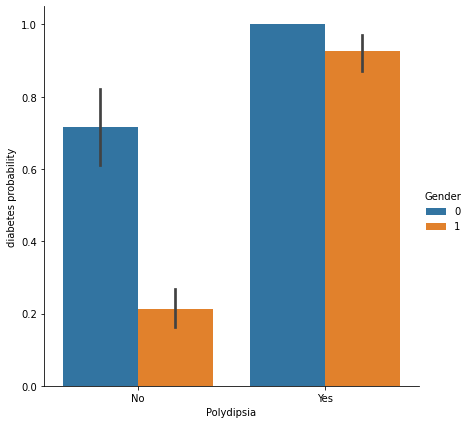

In [15]:
g = sns.catplot(x="Polydipsia", y="class", hue="Gender", data=df,
                   height=6, kind="bar")
g = g.set_ylabels("diabetes probability")
g.set_xticklabels(["No", "Yes"])
new_labels = ['Female', 'Male']


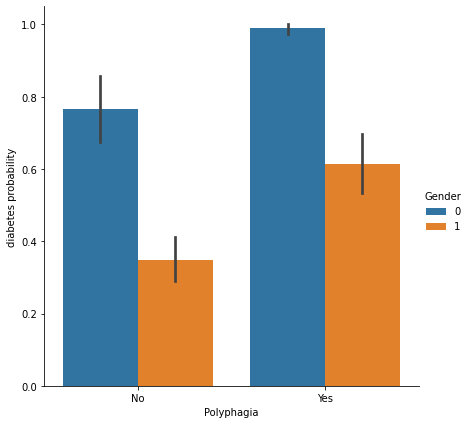

In [16]:
g = sns.catplot(x="Polyphagia", y="class", hue="Gender", data=df,
                   height=6, kind="bar")
g = g.set_ylabels("diabetes probability")
g.set_xticklabels(["No", "Yes"])
new_labels = ['Female', 'Male']


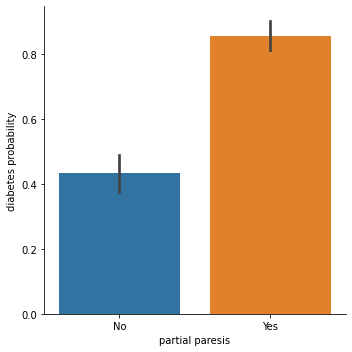

In [17]:
g  = sns.catplot(x="partial paresis",y="class",data=df,kind="bar")
g.set_xticklabels(["No", "Yes"])
g.set_ylabels("diabetes probability")

In [18]:
X1 = df.iloc[:,0:-1]
y1 = df.iloc[:,-1]

In [19]:
y1

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64

In [20]:
X1.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_feature = SelectKBest(score_func=chi2,k=10)
fit = best_feature.fit(X1,y1)

In [22]:
dataset_scores = pd.DataFrame(fit.scores_)
dataset_cols = pd.DataFrame(X1.columns)

In [23]:
featurescores = pd.concat([dataset_cols,dataset_scores],axis=1)
featurescores.columns=['column','scores']

In [24]:
featurescores

,column,scores
0,Age,18.845767
1,Gender,38.747637
2,Polyuria,116.184593
3,Polydipsia,120.785515
4,sudden weight loss,57.749309
5,weakness,12.724262
6,Polyphagia,33.198418
7,Genital thrush,4.914009
8,visual blurring,18.124571
9,Itching,0.047826


In [25]:
print(featurescores.nlargest(10,'scores'))

                column      scores
3           Polydipsia  120.785515
2             Polyuria  116.184593
4   sudden weight loss   57.749309
12     partial paresis   55.314286
1               Gender   38.747637
10        Irritability   35.334127
6           Polyphagia   33.198418
14            Alopecia   24.402793
0                  Age   18.845767
8      visual blurring   18.124571


In [26]:
X = df[['Polydipsia','sudden weight loss','partial paresis','Irritability','Polyphagia','Polyuria','visual blurring']]
y = df['class']

Splitting the dataset into training and testing sets

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

Standardization of independant variables

In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

Cross validation test for training data

In [30]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=lg, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 84.64 %
std is 5.98 %


Prediction

In [31]:
pre=lg.predict(X_test)

Take a look into Accuracy and Confusion matrix

In [32]:
logistic_regression=accuracy_score(pre,y_test)
print(accuracy_score(pre,y_test))
print(confusion_matrix(pre,y_test))

0.9134615384615384
[[34  3]
 [ 6 61]]


Classification Report

In [33]:
from sklearn.metrics import classification_report
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        37
           1       0.95      0.91      0.93        67

    accuracy                           0.91       104
   macro avg       0.90      0.91      0.91       104
weighted avg       0.92      0.91      0.91       104



SVM

In [34]:
from sklearn.svm import SVC
sv=SVC(kernel='linear',random_state=0)
sv.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [35]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=sv, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 85.85 %
std is 5.55 %


In [36]:
pre1=sv.predict(X_test)

In [37]:
svm_linear=accuracy_score(pre1,y_test)
print(accuracy_score(pre1,y_test))
print(confusion_matrix(pre1,y_test))

0.9134615384615384
[[35  4]
 [ 5 60]]


In [38]:
from sklearn.metrics import classification_report
print(classification_report(pre1,y_test))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        39
           1       0.94      0.92      0.93        65

    accuracy                           0.91       104
   macro avg       0.91      0.91      0.91       104
weighted avg       0.91      0.91      0.91       104



In [39]:

from sklearn.svm import SVC
svrf=SVC(kernel='rbf',random_state=0)
svrf.fit(X_train,y_train)


SVC(random_state=0)

In [40]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=svrf, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 87.99 %
std is 3.54 %


In [41]:
pre2=svrf.predict(X_test)

In [42]:
svm_rbf=accuracy_score(pre2,y_test)
print(accuracy_score(pre2,y_test))
print(confusion_matrix(pre2,y_test))

0.9615384615384616
[[37  1]
 [ 3 63]]


In [43]:
from sklearn.metrics import classification_report
print(classification_report(pre2,y_test))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        38
           1       0.98      0.95      0.97        66

    accuracy                           0.96       104
   macro avg       0.95      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
score=[]

for i in range(1,10):
    
    
    knn=KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2)
    knn.fit(X_train,y_train)
    pre3=knn.predict(X_test)
    ans=accuracy_score(pre3,y_test)
    score.append(round(100*ans,2))
print(sorted(score,reverse=True)[:5])
knn=sorted(score,reverse=True)[:1]

[99.04, 98.08, 98.08, 96.15, 96.15]


Naive bayes-Gaussian NB

In [45]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(X_train,y_train)

GaussianNB()

In [46]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=gb, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 85.12 %
std is 5.18 %


In [47]:
pre4=gb.predict(X_test)

In [48]:
Naive_bayes_Gaussian_nb=accuracy_score(pre4,y_test)
print(accuracy_score(pre4,y_test))
print(confusion_matrix(pre4,y_test))

0.9038461538461539
[[33  3]
 [ 7 61]]


In [49]:
from sklearn.metrics import classification_report
print(classification_report(pre4,y_test))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        36
           1       0.95      0.90      0.92        68

    accuracy                           0.90       104
   macro avg       0.89      0.91      0.90       104
weighted avg       0.91      0.90      0.90       104



Decision Tress Classifie

In [50]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion='gini')
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=dc, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 90.40 %
std is 4.39 %


In [52]:
pre5=dc.predict(X_test)

In [53]:
Decisiontress_classifier=accuracy_score(pre5,y_test)
print(accuracy_score(pre5,y_test))
print(confusion_matrix(pre5,y_test))

0.9807692307692307
[[39  1]
 [ 1 63]]


In [54]:
from sklearn.metrics import classification_report
print(classification_report(pre5,y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.98      0.98      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
estime=[]
for i in range(1,100):
    rc=RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=0)
    rc.fit(X_train,y_train)

In [56]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rc, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 90.16 %
std is 4.57 %


In [57]:
pre6 = rc.predict(X_test)

In [58]:
Random_forest=accuracy_score(pre6,y_test)
print(accuracy_score(pre6,y_test))
print(confusion_matrix(pre6,y_test))

0.9807692307692307
[[39  1]
 [ 1 63]]


In [59]:
from sklearn.metrics import classification_report
print(classification_report(pre6,y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.98      0.98      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



Accuracies of all classification model overview

In [60]:
print('Logistic regression:',logistic_regression*100)
print('svmlinear:',svm_linear*100)
print('svmrbf:',svm_rbf*100)
print('knn:',knn)
print('naive bayes:',Naive_bayes_Gaussian_nb*100)
print('Decision tress:',Decisiontress_classifier*100)
print('Random forest:',Random_forest*100)

Logistic regression: 91.34615384615384
svmlinear: 91.34615384615384
svmrbf: 96.15384615384616
knn: [99.04]
naive bayes: 90.38461538461539
Decision tress: 98.07692307692307
Random forest: 98.07692307692307
